In [1]:
#Module 4 Challenge

# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

In [2]:
#Whale Returns

# Reading whale returns

whale_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

In [5]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
#Algorithmic Daily Returns

# Reading Algorithmic Daily Returns
Algorithmic_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/algo_returns.csv")
Algorithmic_returns_df = pd.read_csv(Algorithmic_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
Algorithmic_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
Algorithmic_returns_df.isnull().mean() * 100
Algorithmic_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
Algorithmic_returns_df = Algorithmic_returns_df.dropna()

In [9]:
Algorithmic_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [10]:
# S&P TSX 60 Returns

# Reading S&P TSX 60 Closing Prices

SP_TSX_data = Path("C:/Users/panka/Documents/Module_4_Challenge/sp_tsx_history.csv")
SP_TSX_df = pd.read_csv(SP_TSX_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP_TSX_df.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types
SP_TSX_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types 
SP_TSX_df= SP_TSX_df.replace('[\$\,\.]', '', regex=True).astype(int)

In [13]:
SP_TSX_df.dtypes

Close    int32
dtype: object

In [14]:
SP_TSX_df.head()

,Close
Date,
2012-10-01,1237019
2012-10-02,1239123
2012-10-03,1235947
2012-10-04,1244768
2012-10-05,1241899


In [15]:
# Calculate Daily Returns
SP_TSX_df = SP_TSX_df.pct_change()
SP_TSX_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Drop nulls
SP_TSX_df = SP_TSX_df.dropna()

In [17]:
SP_TSX_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [18]:
# Rename `Close` Column to be specific to this portfolio

SP_TSX_df = SP_TSX_df.rename(columns={"Close" : "S&P TSX"}) 


In [19]:
SP_TSX_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [20]:
# Combining Whale Returns, ALgorithmic Returns & S&P TSX Returns data

#  Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns

Combined_df = pd.concat([whale_returns_df,Algorithmic_returns_df,SP_TSX_df], axis="columns", join="inner")
Combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

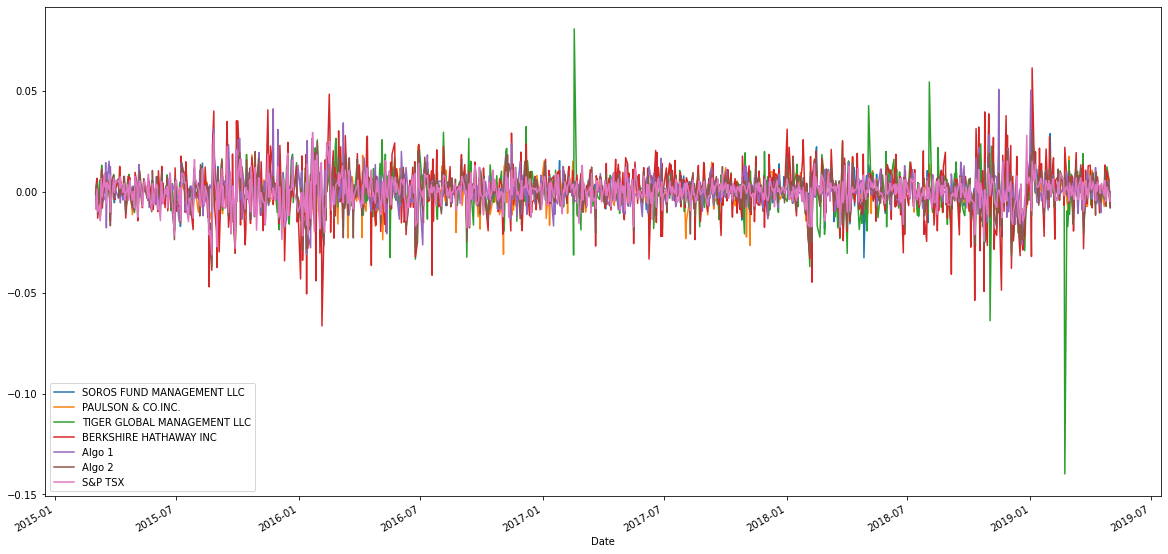

In [21]:
# Quantitative Analysis

# Performance analysis

# Plot daily returns of all portfolios

Combined_df.plot(figsize=(20,10))

In [22]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + Combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

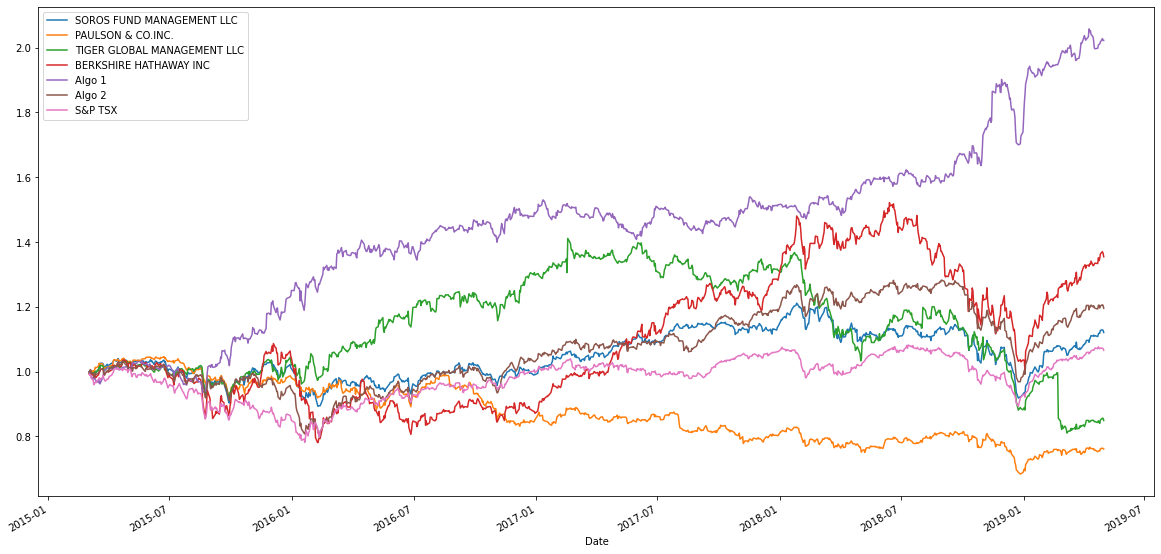

In [23]:
cumulative_returns.plot(figsize=(20,10))

In [24]:
# All the portfolio except Paulson & co outperform S&P TSX 60 in long run

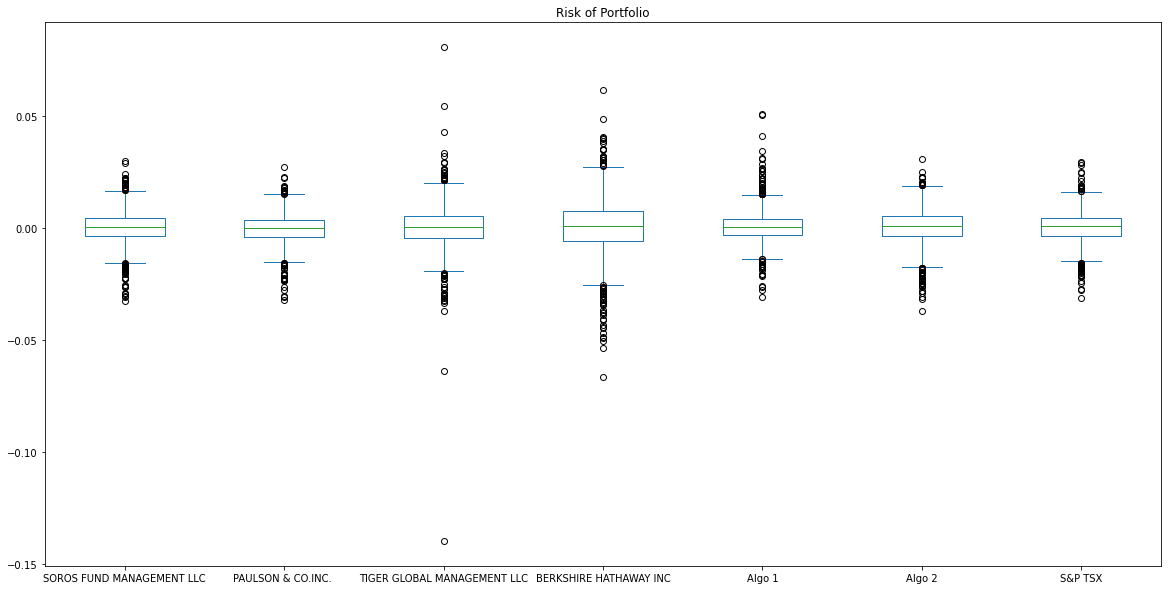

In [25]:
# Risk Analysis

# Box plot of each portfolio to visually show risk

import matplotlib.pyplot as plt
Combined_df.plot(kind='box', figsize=(20,10), title='Risk of Portfolio')
plt.show()


In [26]:
# Calculate the daily standard deviations of all portfolios

Std_dev = Combined_df.std()
Std_dev

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

In [27]:
# Determine which portfolio are riskier than S&P 500

# Calculate  the daily standard deviation of S&P TSX 60
Std_dev["S&P TSX"]

0.007034167748577726

In [28]:
# All the portfolios are riskier than S&P TSX 60

In [29]:
Annualized_std_dev = (Std_dev*np.sqrt(252))
Annualized_std_dev

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

In [30]:
# Rolling Statistics

# Calculate the rolling standard deviation for all portfolios using a 21-day window

Combined_21day_std_dev = Combined_df.rolling(window=21).std()
Combined_21day_std_dev

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

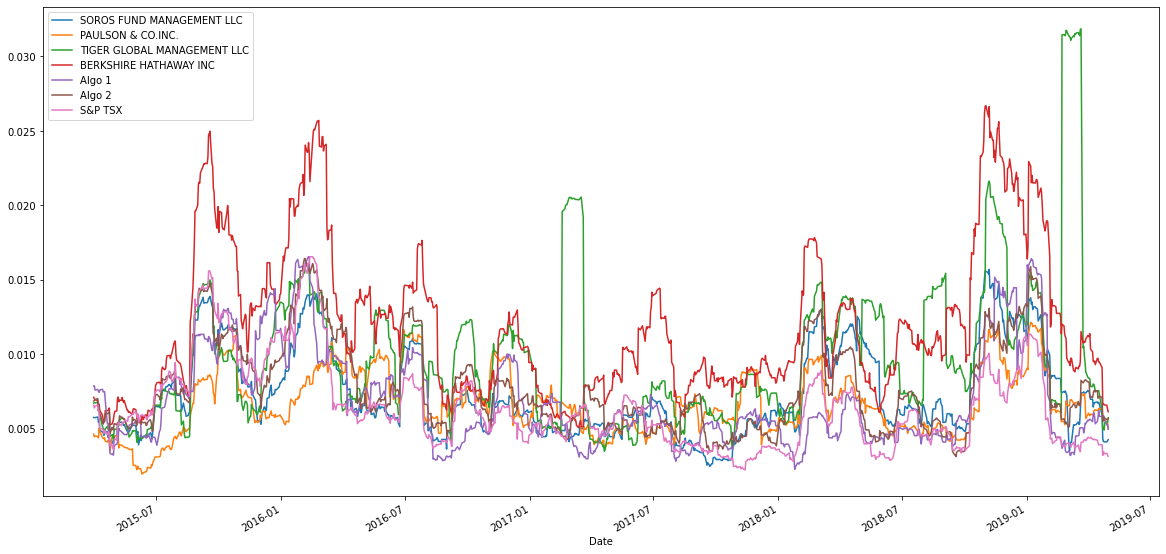

In [31]:
# Plot the rolling standard deviation

Combined_21day_std_dev.plot(figsize=(20,10))

In [32]:
# Calculate the correlation

correlation = Combined_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

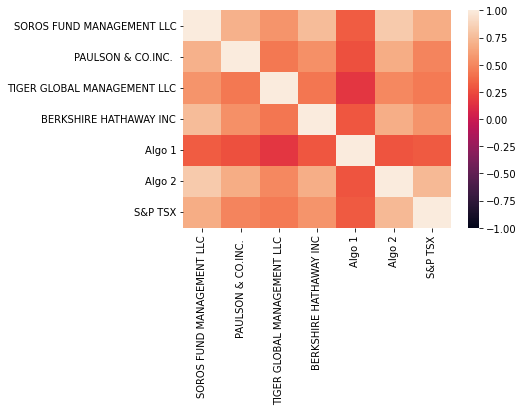

In [33]:
# Display the correlation matrix

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)


In [34]:
# Calculate covariance of a single portfolio (Choosing Soros fund Management LLC)

Soros_covariance = Combined_df["SOROS FUND MANAGEMENT LLC"].cov(Combined_df["S&P TSX"])
Soros_covariance

3.710689907855222e-05

In [35]:
# Calculate variance of S&P TSX
variance = Combined_df["S&P TSX"].var()
variance

4.947951591513103e-05

In [36]:
# Computing beta

Soros_beta = Soros_covariance/variance
Soros_beta

0.7499446668435329

In [37]:
# Plot beta trend
rolling_Soros_covariance = Combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=21).cov(Combined_df["S&P TSX"])

rolling_variance = Combined_df["S&P TSX"].rolling(window=21).var()

rolling_Soros_beta = rolling_Soros_covariance / rolling_variance

<AxesSubplot:title={'center':'Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

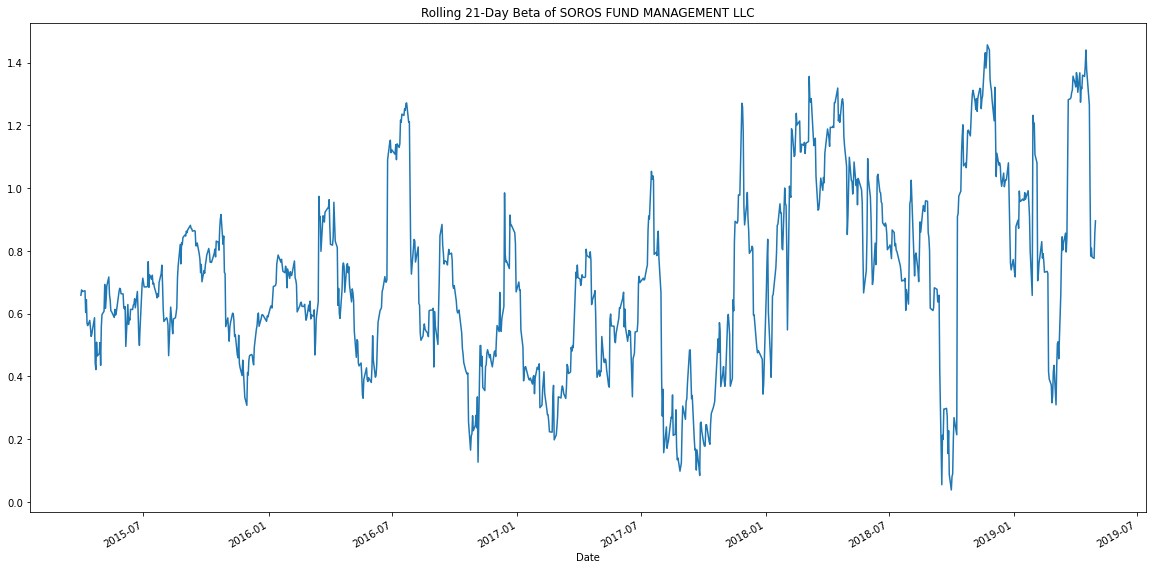

In [38]:
rolling_Soros_beta.plot(figsize=(20, 10), title="Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC")

In [39]:
# Rolling Statistics Challenge (Exponential Weighted Average)

# Use `ewm` to calculate the rolling window

Combined_21expday_std_dev = Combined_df.ewm(span=21, adjust=False).std()
Combined_21expday_std_dev

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.003128,0.005977,0.001886,0.008393,0.003419,0.003094,0.005553
2015-03-06,0.004173,0.004862,0.003918,0.007839,0.003006,0.005624,0.004683
2015-03-09,0.003664,0.005217,0.004396,0.006907,0.002827,0.004951,0.004051
...,...,...,...,...,...,...,...
2019-04-25,0.004767,0.005043,0.007945,0.007519,0.005244,0.006296,0.003693
2019-04-26,0.004939,0.005553,0.008451,0.007602,0.005078,0.006178,0.003543
2019-04-29,0.004717,0.005332,0.008217,0.007288,0.005059,0.005922,0.003421


<AxesSubplot:xlabel='Date'>

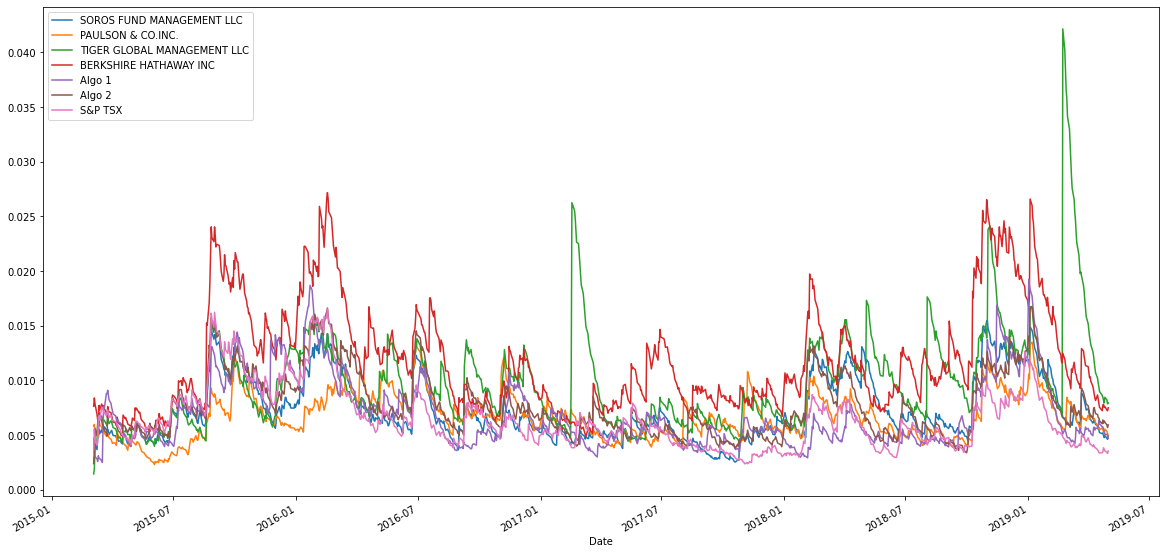

In [40]:
Combined_21expday_std_dev.plot(figsize=(20,10))

In [41]:
# Plot Beta trend based on ewm

rolling_Soros_covariance = Combined_df["SOROS FUND MANAGEMENT LLC"].ewm(span=21, adjust=False).cov(Combined_df["S&P TSX"])

rolling_variance = Combined_df["S&P TSX"].ewm(span=21, adjust=False).var()

rolling_Soros_beta = rolling_Soros_covariance / rolling_variance

<AxesSubplot:title={'center':'Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

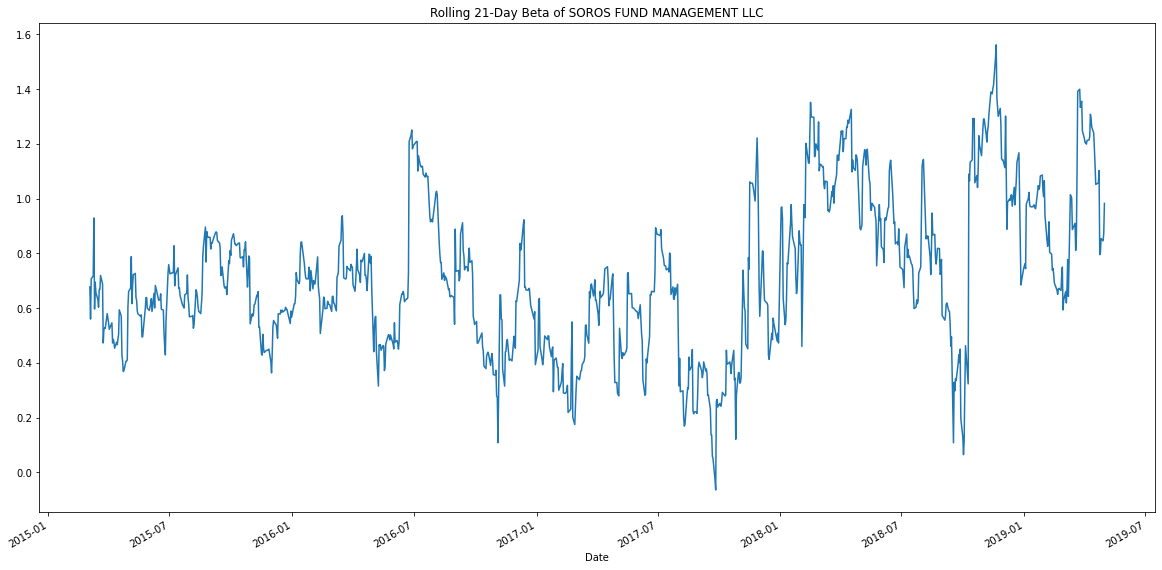

In [42]:
rolling_Soros_beta.plot(figsize=(20, 10), title="Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC")

In [43]:
# Sharpe Ratios

# Annualized Sharpe Ratios

sharpe_ratios = (Combined_df.mean()*252)/(Combined_df.std()*np.sqrt(252))

In [44]:
sharpe_ratios.head(10)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

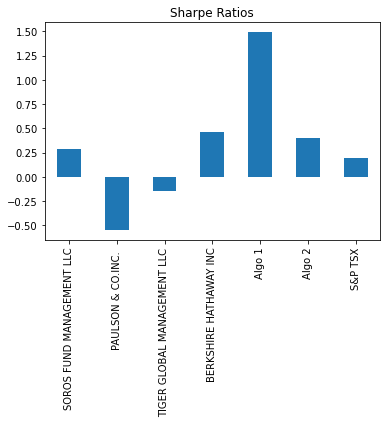

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

# Creating Custom Portfolio

In [46]:
# Reading Data from 1st Stock

In [47]:
AAPL_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/Custom_Portfolio_Pankaj/AAPL.csv")
AAPL_returns_df = pd.read_csv(AAPL_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
AAPL_returns_df.head()

,Close
Date,
2015-01-02,27.33
2015-01-05,26.56
2015-01-06,26.57
2015-01-07,26.94
2015-01-08,27.97


In [48]:
# Reading Data from 2nd Stock

AMZN_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/Custom_Portfolio_Pankaj/AMZN.csv")
AMZN_returns_df = pd.read_csv(AMZN_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
AMZN_returns_df.head()

,Close
Date,
2015-01-02,15.43
2015-01-05,15.11
2015-01-06,14.76
2015-01-07,14.92
2015-01-08,15.02


In [49]:
# Reading Data from 3rd Stock

F_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/Custom_Portfolio_Pankaj/F.csv")
F_returns_df = pd.read_csv(F_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
F_returns_df.head()

,Close
Date,
2015-01-02,15.36
2015-01-05,14.76
2015-01-06,14.62
2015-01-07,15.04
2015-01-08,15.42


In [50]:
# Reading Data from 4th Stock

MU_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/Custom_Portfolio_Pankaj/MU.csv")
MU_returns_df = pd.read_csv(MU_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
MU_returns_df.head()

,Close
Date,
2015-01-02,34.75
2015-01-05,33.78
2015-01-06,32.87
2015-01-07,32.10
2015-01-08,33.67


In [51]:
# Reading Data from 5th Stock

PFE_returns_data = Path("C:/Users/panka/Documents/Module_4_Challenge/Custom_Portfolio_Pankaj/PFE.csv")
PFE_returns_df = pd.read_csv(PFE_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PFE_returns_df.head()

,Close
Date,
2015-01-02,29.68
2015-01-05,29.52
2015-01-06,29.77
2015-01-07,30.17
2015-01-08,30.79


In [52]:
#Renaming Close by replacing close by Symbol
AAPL_returns_df = AAPL_returns_df.rename(columns={"Close" : "AAPL"}) 
AMZN_returns_df = AMZN_returns_df.rename(columns={"Close" : "AMZN"}) 
F_returns_df = F_returns_df.rename(columns={"Close" : "F"}) 
MU_returns_df = MU_returns_df.rename(columns={"Close" : "MU"}) 
PFE_returns_df = PFE_returns_df.rename(columns={"Close" : "PFE"}) 

In [53]:
# Combining the custom portfolio close date

Combined_Custom_df = pd.concat([AAPL_returns_df,AMZN_returns_df,F_returns_df,MU_returns_df,PFE_returns_df], axis="columns", join="inner")
Combined_Custom_df.head()

,AAPL,AMZN,F,MU,PFE
Date,,,,,
2015-01-02,27.33,15.43,15.36,34.75,29.68
2015-01-05,26.56,15.11,14.76,33.78,29.52
2015-01-06,26.57,14.76,14.62,32.87,29.77
2015-01-07,26.94,14.92,15.04,32.10,30.17
2015-01-08,27.97,15.02,15.42,33.67,30.79


In [54]:
# Calculate daily returns of Custom Combined Portfoli0

Custom_Daily_Returns = Combined_Custom_df.pct_change()
Custom_Daily_Returns


,AAPL,AMZN,F,MU,PFE
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028174,-0.020739,-0.039062,-0.027914,-0.005391
2015-01-06,0.000377,-0.023163,-0.009485,-0.026939,0.008469
2015-01-07,0.013925,0.010840,0.028728,-0.023426,0.013436
2015-01-08,0.038233,0.006702,0.025266,0.048910,0.020550
...,...,...,...,...,...
2019-12-24,0.000986,-0.002119,0.003178,0.000361,-0.000805
2019-12-26,0.019840,0.044489,-0.002112,-0.005594,0.002418
2019-12-27,-0.000414,0.000535,-0.009524,-0.019597,-0.001608


In [55]:
# Drop NAs from Daily Returns

Custom_Daily_Returns = Custom_Daily_Returns.dropna()

# Display sample data

Custom_Daily_Returns.head()

,AAPL,AMZN,F,MU,PFE
Date,,,,,
2015-01-05,-0.028174,-0.020739,-0.039062,-0.027914,-0.005391
2015-01-06,0.000377,-0.023163,-0.009485,-0.026939,0.008469
2015-01-07,0.013925,0.010840,0.028728,-0.023426,0.013436
2015-01-08,0.038233,0.006702,0.025266,0.048910,0.020550
2015-01-09,0.001073,-0.011318,-0.013619,-0.004158,0.004547


In [56]:
# Calculate weighted returns for your portfolio, assuming equal number of shares per stock.

weights = [1/5, 1/5, 1/5,1/5,1/5]

Custom_Portfolio_Returns_df = Custom_Daily_Returns.dot(weights)



Custom_Portfolio_Returns_df.head()

Date
2015-01-05   -0.024256
2015-01-06   -0.010148
2015-01-07    0.008701
2015-01-08    0.027932
2015-01-09   -0.004695
dtype: float64

In [57]:
# Join the Custom DataFrame to the original returns DataFrame

Combined_returns_df = pd.concat([Custom_Portfolio_Returns_df,Combined_df], axis="columns", join="inner")
Combined_returns_df.head()
                                

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2015-03-03,-0.016242,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,-0.006046,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.000717,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.014148,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.002899,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [69]:
Combined_returns_df = Combined_returns_df.rename(columns={0 : "Pankaj LLC"}) 

In [70]:
Combined_returns_df.head()

,Pankaj LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2015-03-03,-0.016242,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,-0.006046,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.000717,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.014148,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.002899,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [71]:
# Calculate the annualised standard deviation
Combined_Std_dev = Combined_returns_df.std()
Annualised_Combined_Std_dev = (Combined_Std_dev*np.sqrt(252))
Annualised_Combined_Std_dev

Pankaj LLC                     0.199384
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

In [72]:
# Calculate and plot the rolling standard deviation with a 21-day window

Combined_Rolling_Std_21_Deviation = Combined_returns_df.rolling(window=21).std()
Combined_Rolling_Std_21_Deviation

,Pankaj LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.007176,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.008064,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.008242,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

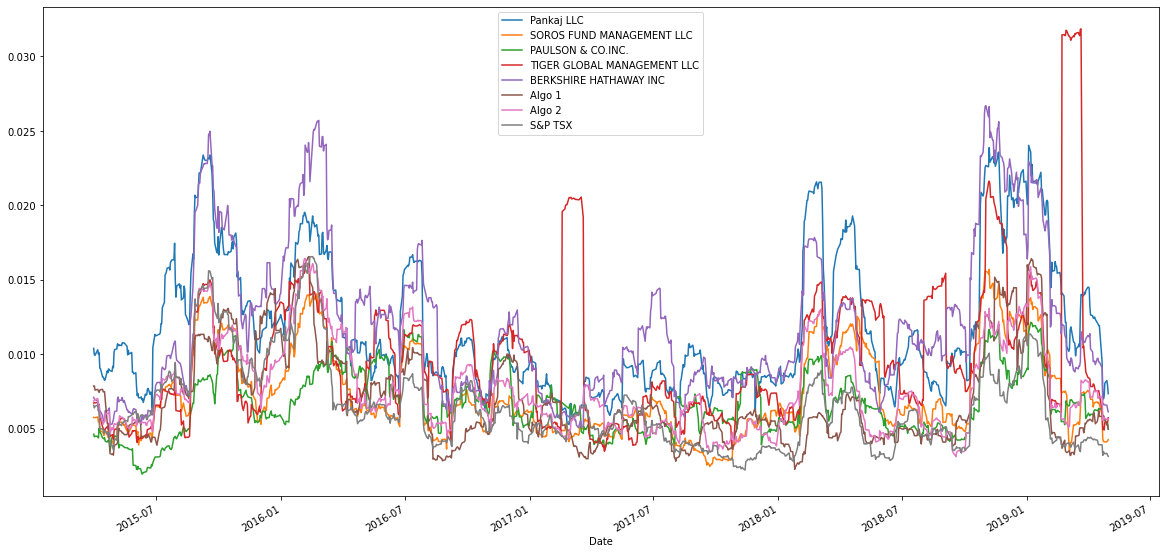

In [73]:
# Plot rolling standard deviation
Combined_Rolling_Std_21_Deviation.plot(figsize = (20,10))

In [74]:
# Calculate and plot the correlation

Combined_Correlation =  Combined_returns_df.corr()
Combined_Correlation

,Pankaj LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Pankaj LLC,1.000000,0.755073,0.617716,0.491589,0.716247,0.299611,0.752253,0.628581
SOROS FUND MANAGEMENT LLC,0.755073,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.617716,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.491589,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.716247,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.299611,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.752253,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.628581,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

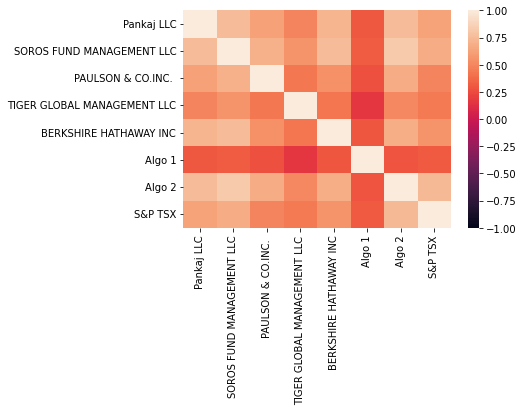

In [75]:
sns.heatmap(Combined_Correlation, vmin=-1, vmax=1)

In [76]:
# Calculate and plot beta custom portfolio compared to the S&P 60 TSX

# Calculate Covariance of custom Portfolio

Pankaj_LLC_covariance = Combined_returns_df["Pankaj LLC"].cov(Combined_df["S&P TSX"])
Pankaj_LLC_covariance

5.553464979416155e-05

In [77]:
# Calculate variance of SP500
SP_Variance = Combined_returns_df["S&P TSX"].var()
SP_Variance

4.947951591513103e-05

In [78]:
# Calculate Beta of custom portfolio

Beta_Custom_Portfolio = Pankaj_LLC_covariance/SP_Variance
Beta_Custom_Portfolio

1.122376578813271

In [79]:
# plot beta for your portfolio compared to the S&P 60 TSX
rolling_Pankaj_LLC_covariance = Combined_returns_df["Pankaj LLC"].rolling(window=21).cov(Combined_df["S&P TSX"])

rolling_SP500_variance = Combined_returns_df["S&P TSX"].rolling(window=21).var()

rolling_Pankaj_beta = rolling_Pankaj_LLC_covariance / rolling_SP500_variance
rolling_Pankaj_beta 

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.006956
2019-04-26    0.958548
2019-04-29    1.015485
2019-04-30    1.325248
2019-05-01    0.867882
Length: 1029, dtype: float64

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Pankaj LLC'}, xlabel='Date'>

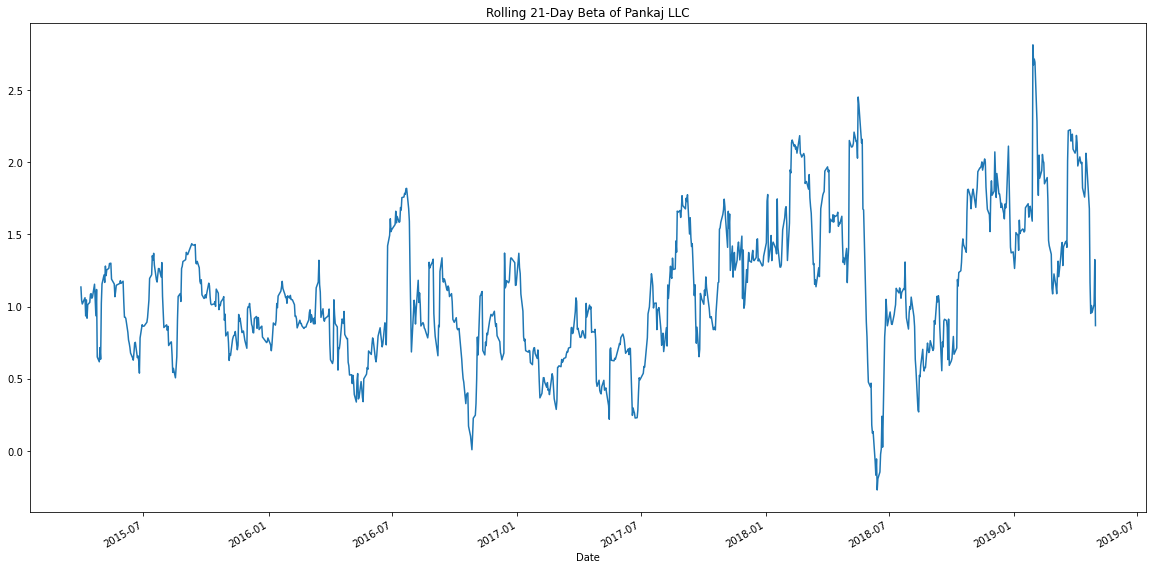

In [80]:
rolling_Pankaj_beta.plot(figsize =(20,10),title="Rolling 21-Day Beta of Pankaj LLC")

In [81]:
# Calculate the Sharpe ratios and generate a bar plot

# Annualized Sharpe Ratios

Combined_sharpe_ratios = (Combined_returns_df.mean()*252)/(Combined_returns_df.std()*np.sqrt(252))
Combined_sharpe_ratios

Pankaj LLC                     0.610849
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio of Combined Portfolio'}>

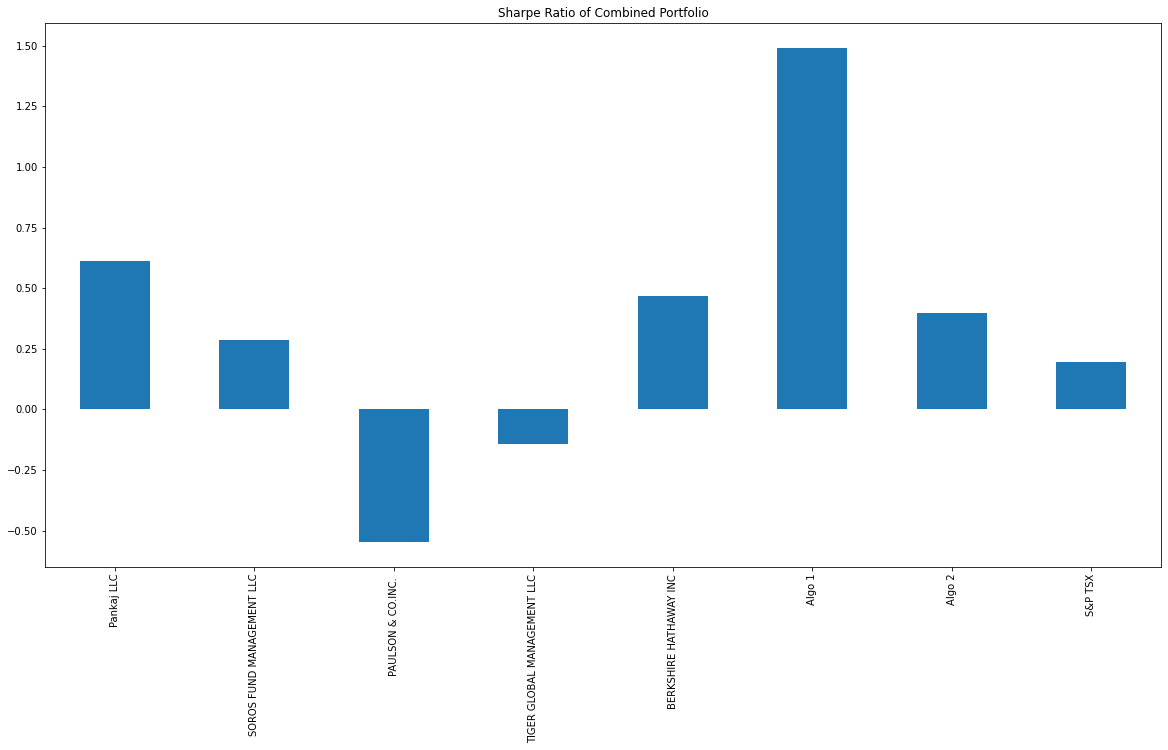

In [82]:
# Generate a bar plot of Sharpe Ratios

Combined_sharpe_ratios.plot.bar(figsize =(20,10),title="Sharpe Ratio of Combined Portfolio")

In [83]:
# My Portfolio did well when compared to most of the other portfolios. As per Sharpe ratio, Algo 1 gave better returns
# in the long run compared to my portfolio, howevwer my portfolio returns was closer to Berkshire Hathway Portfolio which indicates better risk return portfolio.